In [1]:
import numpy as np
from scipy import optimize
import os
import pandas as pd
import ipdb

%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from s_annealing_cost_solution import *
raw_data = pd.read_csv(os.path.join("data","tmja-2019.csv"), sep=";")
for colonne in raw_data.columns:
    try:
        raw_data[colonne] = raw_data[colonne].apply(lambda element:element.replace(',',"."))
    except:
        # print(raw_data[colonne].dtype)
        pass
for colonne in raw_data.columns:
    try:
        raw_data[colonne] = raw_data[colonne].astype(float)
    except:
        pass

df = raw_data[["route",'xD',"yD","xF", "yF","TMJA","ratio_PL"]]
df.loc[:, ['xD',"yD","xF", "yF"]]/=1e5
values =["x","y"]
for value in values:
    df.loc[:,f'center_{value}'] = (df.loc[:, f"{value}D"]+df.loc[:,f"{value}F"])/2
df['proper_ratio_PL'] = df["ratio_PL"].apply(compute_proper_ratio_pl)
df.dropna(inplace=True)
df["daily_flow_trucks"] = (df["proper_ratio_PL"]/100) *df['TMJA']
problem_solver =  AnnealingSolver(number_clusters=120)
number_variables = problem_solver.number_clusters*2
cost_function = problem_solver.create_final_cost_function(df[['center_x','center_y']].values, df['daily_flow_trucks'], 350)
lower_bounds = problem_solver.create_linear_bounds_unconstrained_version(number_variables)
X = np.random.rand(1000,2)
Y = np.random.randn(number_variables//2,2)
Y[:,0]+=7
# Y[:,0]+=1
Y[:,1]+=64
# Y[:,1]+=9

In [4]:
problem_solver.fit_annealing(df[['center_x','center_y','daily_flow_trucks']],maximal_distance=300, max_iters=30)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [5]:
cost_function(problem_solver.final_position.flatten())

4047.074477491

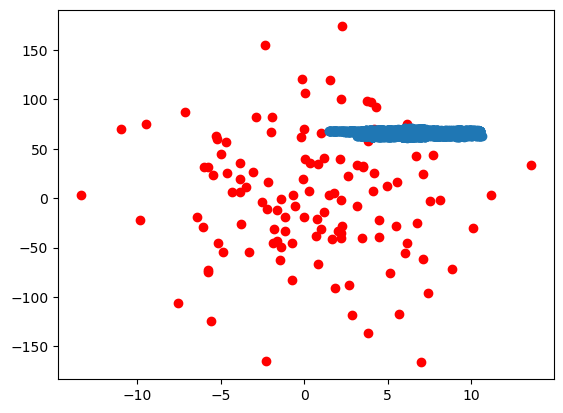

In [6]:
import matplotlib.pyplot as plt
plt.scatter(problem_solver.final_position[:,0], problem_solver.final_position[:,1], color='red')
plt.scatter(df['center_x'], df['center_y'])

In [40]:
distance_matrix = problem_solver.compute_distance_matrix(problem_solver.final_position, problem_solver.center_roads)

In [29]:
cost_function(Y.flatten())

16       9825.0500
22      17108.9982
23      17108.9982
24      17108.9982
25      15694.2142
           ...    
4683      638.0850
4684      638.0850
4685      638.0850
4688     2567.9940
4689     3336.6600
Name: daily_flow_trucks, Length: 3061, dtype: float64

In [30]:
# dual annealing global optimization for the ackley multimodal objective function
from scipy.optimize import dual_annealing
from numpy.random import rand
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
 
# objective function
def objective(v):
 x, y = v
 return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20
 
# define range for input
r_min, r_max = -5.0, 5.0
# define the bounds on the search
bounds = [[r_min, r_max], [r_min, r_max]]
# perform the dual annealing search
result = dual_annealing(objective, bounds)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : ['Maximum number of iteration reached']
Total Evaluations: 4211
Solution: f([-4.47727497e-09  1.69571105e-09]) = 0.00000
